In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f = open('202303tmoney.csv', 'r')
data = csv.reader(f)
h = next(data)
h = next(data)

In [3]:
def strtoint(strint):
    strlist = strint.split(',')
    toint = 0
    for i in range(len(strlist)):
        toint += int(strlist[i])*(1000**(len(strlist)-i-1))

    return toint

In [4]:
#10, 11 / 12, 13 (7시, 8시)
geton = {}
getoff = {}
getonoff = {}

for row in data:
    on = strtoint(row[10])+strtoint(row[12])
    off = strtoint(row[11])+strtoint(row[13])
    geton[row[3]] = on
    getoff[row[3]] = off
    getonoff[row[3]] = on+off

In [6]:
def rank30(station, datas, ranklist):
    if len(ranklist)==0:
        ranklist.append(station)
    else:
        i = 0
        for i in range(len(ranklist)):
            if datas[ranklist[i]]<datas[station]:
                ranklist.append(ranklist[len(ranklist)-1])
                for j in range(len(ranklist)-2, i, -1):
                    ranklist[j] = ranklist[j-1]
                ranklist[i] = station
                break
        
        if ranklist.count(station)==0:
            ranklist.append(station)

In [7]:
onrank = []
offrank = []
onoffrank = []

j = 0

for station in getonoff:
    rank30(station, geton, onrank)
    rank30(station, getoff, offrank)
    rank30(station, getonoff, onoffrank)

구로디지털단지
서울대입구(관악구청)
까치산
화곡
쌍문
수유(강북구청)
역곡
신대방
부천
낙성대(강감찬)
봉천
송내
강변(동서울터미널)
미아사거리
금정
암사
개봉
구의(광진구청)
길음
범계
철산
구파발
염창
광명사거리
안양
상계
부평
삼송
응암
노량진


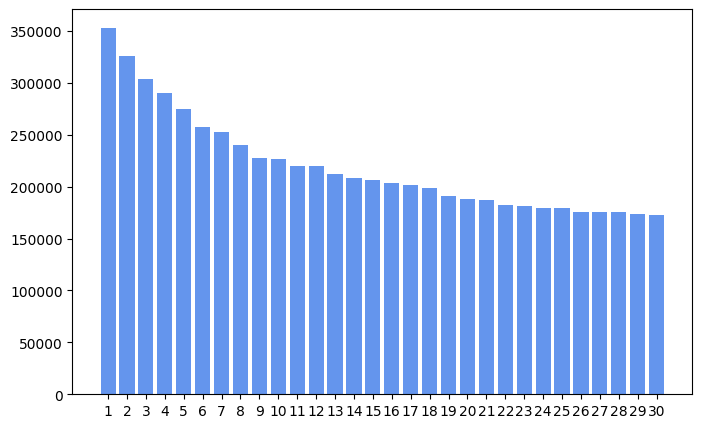

In [14]:
plt.figure(figsize=(8, 5))

for i in range(30):
    plt.bar(i+1, geton[onrank[i]], color='cornflowerblue')
    print(onrank[i])

plt.xticks(np.arange(1, 31))
plt.show()

역삼
가산디지털단지
삼성(무역센터)
을지로입구
강남
종각
광화문(세종문화회관)
양재(서초구청)
성수
구로디지털단지
여의도
시청
서대문
충무로
학동
용산
문정
남부터미널(예술의전당)
청담
안국
압구정
회현(남대문시장)
국회의사당
영등포
선릉
명동
경복궁(정부서울청사)
혜화
뚝섬
문래


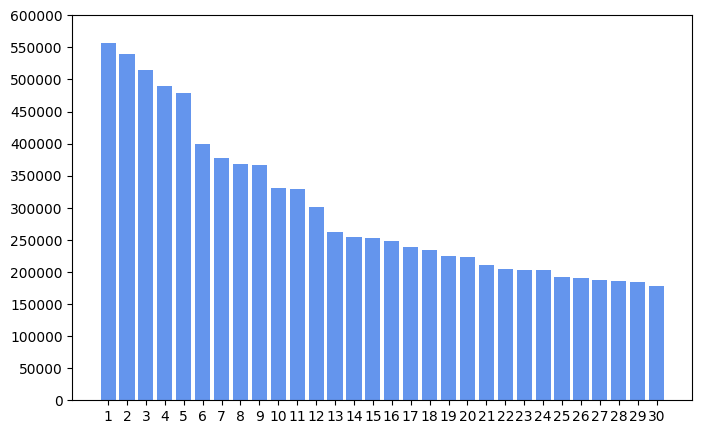

In [15]:
plt.figure(figsize=(8, 5))

for i in range(30):
    plt.bar(i+1, getoff[offrank[i]], color='cornflowerblue')
    print(offrank[i])

plt.xticks(np.arange(1, 31))
plt.yticks(np.arange(0, 600001, 50000))
plt.show()

구로디지털단지
역삼
가산디지털단지
강남
삼성(무역센터)
을지로입구
양재(서초구청)
서울대입구(관악구청)
성수
종각
광화문(세종문화회관)
금정
여의도
화곡
수유(강북구청)
까치산
송내
쌍문
인덕원
시청
남부터미널(예술의전당)
역곡
서대문
영등포
용산
부천
문정
낙성대(강감찬)
신대방
충무로


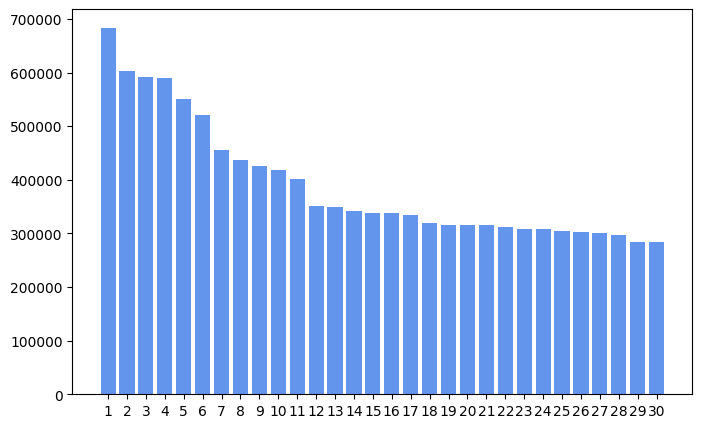

In [16]:
plt.figure(figsize=(8, 5))

for i in range(30):
    plt.bar(i+1, getonoff[onoffrank[i]], color='cornflowerblue')
    print(onoffrank[i])

plt.xticks(np.arange(1, 31))
plt.show()

In [ ]:
f.close()